In [ ]:
pip install nltk==3.4

In [ ]:
import nltk
import re 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer 
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid", context='talk', 
        #palette=['#76470A'])

seed = 123



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sample = pd.read_csv('/content/Data Scrape Combined Final.csv')
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Links   5528 non-null   object
 1   Claims  5528 non-null   object
 2   Date    5528 non-null   object
 3   Source  5528 non-null   object
 4   Year    5528 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 216.1+ KB


In [ ]:
sample.head()

,Links,Claims,Date,Source,Year
0,https://www.boomlive.in/world/self-described-v...,Dr. Hari Harinis death was due to diclofenac w...,31-Mar-21,Boom Live,2021
1,https://www.boomlive.in/fact-check/fake-kolkat...,Former chief justice of India Ranjan Gogoi twe...,31-Mar-21,Boom Live,2021
2,https://www.boomlive.in/fact-check/fake-news-a...,Audio clip on COVID relates to Dr. Trehan of M...,31-Mar-21,Boom Live,2021
3,https://www.boomlive.in/coronavirus-outbreak/b...,Woman assaulted by members of Bajrang Dal and RSS,31-Mar-21,Boom Live,2021
4,https://www.boomlive.in/fact-check/west-bengal...,Image shows one of Amit Shahs recent rallies.,31-Mar-21,Boom Live,2021


In [ ]:
sample['Source'].value_counts()

Boom Live         3600
Logical Indian    1008
India Today        920
Name: Source, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sample['Claims'], sample['Source'], 
                                                    test_size=1000, 
                                                    random_state=seed, 
                                                    stratify=sample['Source'])

train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['Source'].value_counts()}\n")

print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['Source'].value_counts())




Train: 4528 rows and 2 columns
Boom Live         2949
Logical Indian     826
India Today        753
Name: Source, dtype: int64

Test: 1000 rows and 2 columns
Boom Live         651
Logical Indian    182
India Today       167
Name: Source, dtype: int64


In [ ]:
train.head()

,Claims,Source
5413,Three Dalit Men Beaten By RSS In Tamil Nadhu F...,Boom Live
3813,Viral letter is by CDS Bipin Rawat,Boom Live
525,Video shows child abducted and murdered,Boom Live
4993,Video claims Congress MP Anil Upadhay thrashed...,Boom Live
5029,Video shows Hindu mob beating a Muslim minor f...,Boom Live


In [ ]:
train_string = " ".join(x_train.values)
print(f"***** Extract of train_string ***** \n{train_string}", "\n")

splits = train_string.split()  
print(f"***** Extract of splits ***** \n{splits[:20]}\n")


***** Extract of train_string ***** 
Three Dalit Men Beaten By RSS In Tamil Nadhu For Saying Jai Bhim Viral letter is by CDS Bipin Rawat Video shows child abducted and murdered Video claims Congress MP Anil Upadhay thrashed a cop Video shows Hindu mob beating a Muslim minor forcing him to convert to Hinduism India to grow at 8% in 2020  Picture is of lockdown violators cleaning a lake as punishment given by Karnataka police Coronavirus found in chicken in Bangalore  Video of Rahul and Priyanka Gandhi breaking coronavirus lockdown by stepping outThe viral video is four months old and has no connection to coronavirus The Logical Indian Fact check team investigates the claim that CM Mamata Banerjee did not greet PM Modi during his Bengal visit after Cyclone Amphan  Environment Minister, Indian Studies Have Indeed Shown That Air Pollution Shortens Life  Video shows a scene from a crowded railway station in the outbreak of Coronavirus Picture shows a housing project constructed by the West 

In [ ]:
print(f"Number of strings: {len(splits)}")
print(f"Number of unique strings: {len(set(splits))}")

Number of strings: 67402
Number of unique strings: 10008


In [ ]:
freq_splits = FreqDist(splits)
print(f"***** 10 most common strings ***** \n{freq_splits.most_common(10)}", "\n")

***** 10 most common strings ***** 
[('the', 2109), ('in', 1781), ('of', 1631), ('a', 1611), ('shows', 1130), ('to', 1036), ('Video', 813), ('that', 717), ('and', 702), ('is', 661)] 



In [ ]:
short = set(s for s in splits if len(s)<4)
short = [(s, freq_splits[s]) for s in short]
short.sort(key=lambda x:x[1], reverse=True)
short

[('the', 2109),
 ('in', 1781),
 ('of', 1631),
 ('a', 1611),
 ('to', 1036),
 ('and', 702),
 ('is', 661),
 ('The', 585),
 ('on', 548),
 ('for', 438),
 ('has', 427),
 ('by', 406),
 ('A', 385),
 ('at', 377),
 ('was', 288),
 ('In', 257),
 ('are', 246),
 ('Of', 212),
 ('as', 205),
 ('BJP', 197),
 ('his', 187),
 ('an', 186),
 ('who', 175),
 ('man', 167),
 ('To', 162),
 ('PM', 143),
 ('be', 131),
 ('not', 131),
 ('An', 124),
 ('old', 116),
 ('her', 102),
 ('it', 101),
 ('he', 86),
 ('On', 75),
 ('And', 72),
 ('US', 72),
 ('Is', 71),
 ('By', 66),
 ('up', 63),
 ('CM', 63),
 ('Ram', 62),
 ('Rs', 59),
 ('out', 57),
 ('RSS', 54),
 ('As', 54),
 ('can', 53),
 ('UP', 52),
 ('two', 51),
 ('one', 50),
 ('its', 48),
 ('For', 47),
 ('New', 47),
 ('had', 46),
 ('him', 46),
 ('due', 44),
 ('At', 39),
 ('Not', 39),
 ('Day', 38),
 ('MLA', 38),
 ('new', 37),
 ('Air', 37),
 ('if', 36),
 ('no', 35),
 ('Dr', 33),
 ('Man', 33),
 ('JNU', 30),
 ('she', 29),
 ('day', 29),
 ('Old', 26),
 ('CAA', 26),
 ('MP', 26),
 ('b

In [ ]:
long = set(s for s in splits if len(s)>15)
long = [(s, freq_splits[s]) for s in long]
long.sort(key=lambda x:x[1], reverse=True)
long

[('India-Bangladesh', 4),
 ('hydroxychloroquine,', 2),
 ('Balasubrahmanyam‚Äôs', 2),
 ('agriculture-related', 2),
 ('Avimukteshwaranand', 2),
 ('‡§ï‡§∞‡§¨‡§æ‡§§‡•Ä', 2),
 ('child-kidnapping', 2),
 ('Mumbai-Latur-Bidar', 2),
 ('anti-Citizenship', 2),
 ('African-American', 1),
 ('Fazal-ur-Rehman,', 1),
 ('fingerprint-shaped', 1),
 ('Mumbai/Ahmedabad/Bengaluru', 1),
 ('#‡§π‡§Æ_‡§∏‡§Ç‡§ò‡•Ä_‡§π‡•à', 1),
 ('Pakistan-occupied', 1),
 ('Coronavirus-infected', 1),
 ('Pakistan-Sponsored', 1),
 ('differently-abled', 1),
 ('coronavirus-infected', 1),
 ('Panchavarnaswamy', 1),
 ('Actor-politician', 1),
 ('Guwahati-Shillong', 1),
 ('Pakistan-occupied-Kashmir', 1),
 ('anti-encroachment', 1),
 ('Spanish-American', 1),
 ('Passport‚Ää‚ÄäConcept', 1),
 ('Chandrashekharan', 1),
 ("''narendrmodiawasyojna", 1),
 ('explosive-filled', 1),
 ('Calmette-Gu√©rin', 1),
 ('agriculture-based', 1),
 ('surface-to-surface', 1),
 ('anti-tuberculosis', 1),
 ('indiscriminately', 1),
 ('actor-turned-politician', 1),
 ('‚Äú

In [ ]:
tokeniser = RegexpTokenizer("[A-Za-z]+")
tokens = tokeniser.tokenize(train_string)
print(tokens[:20], "\n")

['Three', 'Dalit', 'Men', 'Beaten', 'By', 'RSS', 'In', 'Tamil', 'Nadhu', 'For', 'Saying', 'Jai', 'Bhim', 'Viral', 'letter', 'is', 'by', 'CDS', 'Bipin', 'Rawat'] 



In [ ]:
print(f"Number of tokens: {len(tokens)}")
print(f"Number of unique tokens: {len(set(tokens))}")

Number of tokens: 67377
Number of unique tokens: 8563


In [ ]:
lemmatiser = WordNetLemmatizer()
tokens_norm = [lemmatiser.lemmatize(t.lower(), "v") for t in tokens]
print(f"Number of unique tokens: {len(set(tokens_norm))}")

Number of unique tokens: 6138


In [ ]:
stop_words = stopwords.words("english")
print(f"There are {len(stop_words)} stopwords.\n")
more_stop_words = ['video', 'viral', 'post', 'social','media', 'image', 'fact', 'fake', 'check', 'claim', 'photo', 'false','logical indian', 'logical', 'indian', 'users', 'share', 'investigate',"team", "claim", "show"]
stop_words.extend(more_stop_words)
print(len(stop_words))

There are 179 stopwords.

200


In [ ]:
freq_stopwords = [(sw, tokens_norm.count(sw)) for sw in stop_words]
freq_stopwords.sort(key=lambda x: x[1], reverse=True)
freq_stopwords[:10]

[('the', 2702),
 ('in', 2058),
 ('a', 2001),
 ('be', 1991),
 ('of', 1843),
 ('show', 1510),
 ('to', 1202),
 ('video', 1077),
 ('claim', 781),
 ('claim', 781)]

In [ ]:
n_stopwords = len([t for t in tokens_norm if t in stop_words])
print(f"{n_stopwords} tokens are stop words.")
print(f"That is {round(100*n_stopwords/len(tokens_norm),2)}%.")

29292 tokens are stop words.
That is 43.47%.


In [ ]:
tokens_clean = [t for t in tokens_norm if t not in stop_words]
print(f"Number of tokens: {len(tokens_clean)}")

Number of tokens: 38085


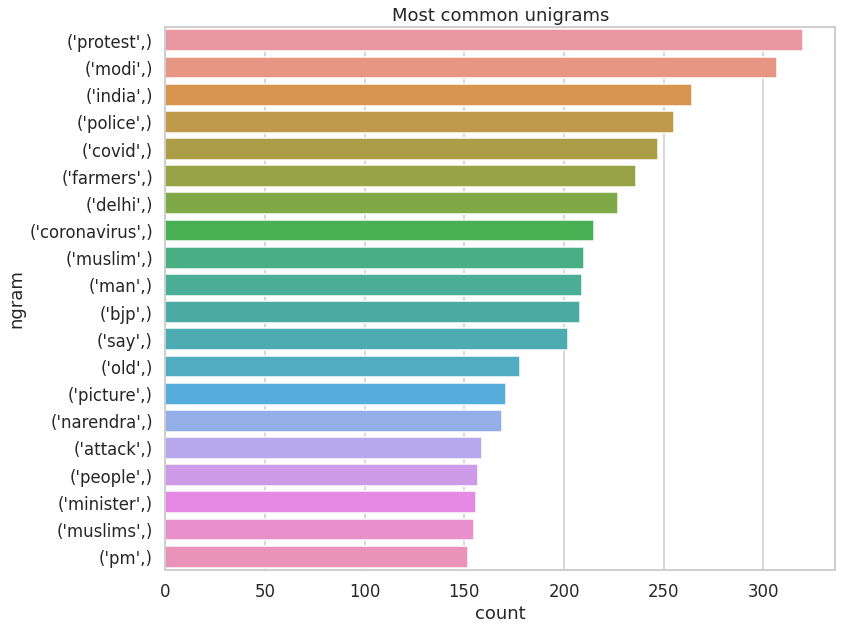

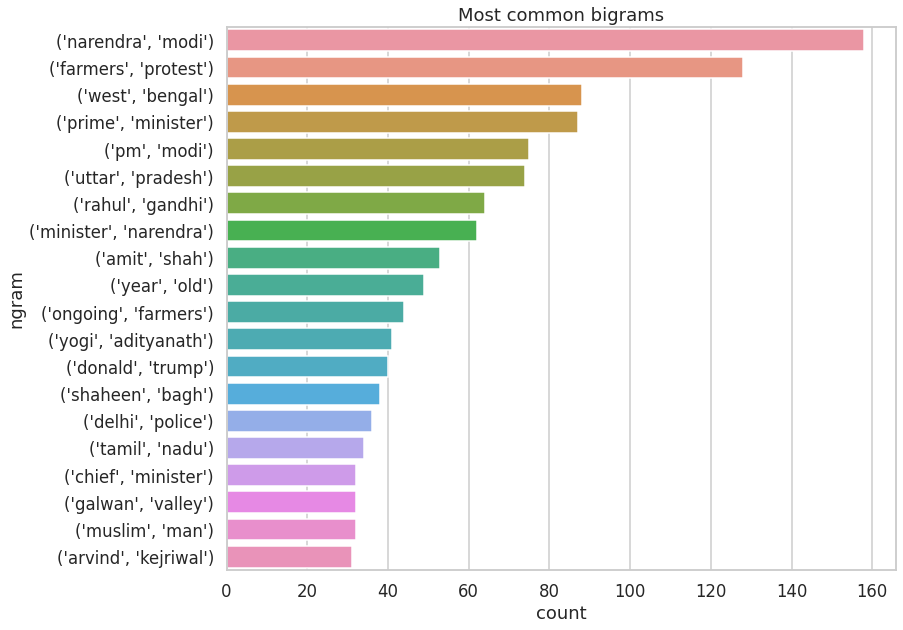

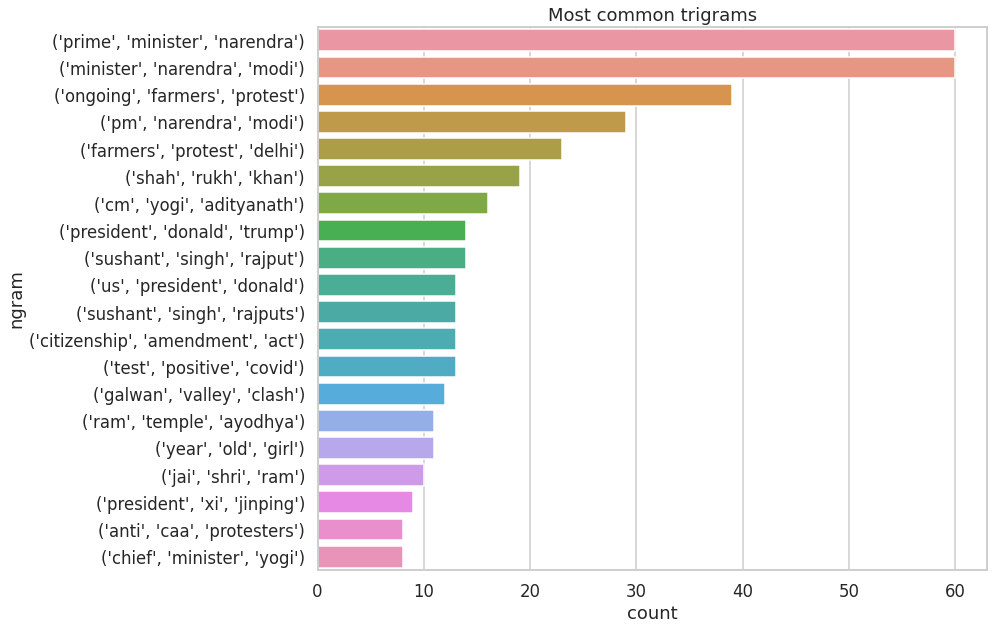

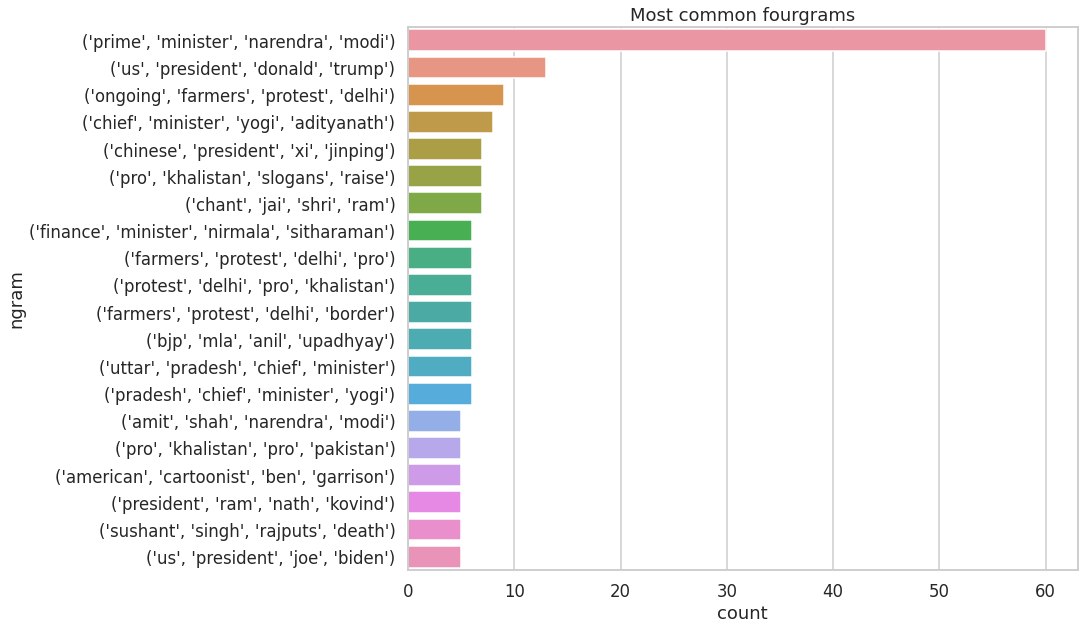

In [ ]:
def preprocess_text(text):
    """Preprocess text into normalised tokens."""
    # Tokenise words into alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords
def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [preprocess_text(document) for document in corpus]
    
    # Find ngrams per document
    try:
      n_grams = [list(ngrams(document, ngram)) for document in documents]
    except StopIteration:
            return
    
    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])

    top_freq
    
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(12,10))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(train['Claims'], i))
    plt.title(f"Most common {mapping[i]}grams");



In [ ]:
data1 = get_frequent_ngram(train['Claims'], 1)
df = pd.DataFrame(data1, columns=['ngram','count'])
df.to_csv('Unigram.csv', index=False, encoding='utf-8')
data2 = get_frequent_ngram(train['Claims'], 2)
df = pd.DataFrame(data2, columns=['ngram','count'])
df.to_csv('Bigram.csv', index=False, encoding='utf-8')
data3 = get_frequent_ngram(train['Claims'], 3)
df = pd.DataFrame(data3, columns=['ngram','count'])
df.to_csv('Trigram.csv', index=False, encoding='utf-8')
data4 = get_frequent_ngram(train['Claims'], 4)
df = pd.DataFrame(data4, columns=['ngram','count'])
df.to_csv('Fourgram.csv', index=False, encoding='utf-8')

In [ ]:
# tokeniser = RegexpTokenizer("[A-Za-z]+")
train["n_sentences"] = train["Claims"].apply(sent_tokenize).apply(len)
train["tokens"] = train["Claims"].apply(tokeniser.tokenize)
train["n_tokens"] = train["tokens"].apply(len)
train["n_characters"] = train["Claims"].apply(len)
train["n_stopwords"] = train["tokens"].apply(lambda tokens: len([t for t in tokens if t in stop_words]))
train["p_stopwords"] = train["n_stopwords"]/train["n_tokens"]
# Inspect head
columns = ['Source', 'n_sentences', 'n_tokens', 'n_characters', 'n_stopwords', 'p_stopwords']
train[columns].head()

,Source,n_sentences,n_tokens,n_characters,n_stopwords,p_stopwords
5413,Boom Live,1,13,64,0,0.000000
3813,Boom Live,1,7,34,2,0.285714
525,Boom Live,1,6,39,1,0.166667
4993,Boom Live,1,9,52,1,0.111111
5029,Boom Live,1,14,79,4,0.285714


In [ ]:
train.describe()

,n_sentences,n_tokens,n_characters,n_stopwords,p_stopwords
count,4528.000000,4528.000000,4528.000000,4528.000000,4526.000000
mean,1.012367,14.880080,89.752871,4.612633,0.270317
std,0.128977,6.824181,39.101728,4.171668,0.159613
min,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,10.000000,61.000000,2.000000,0.166667
50%,1.000000,13.000000,80.000000,4.000000,0.285714
75%,1.000000,18.250000,111.000000,7.000000,0.390700
max,4.000000,61.000000,321.000000,37.000000,0.692308


In [ ]:
num_vars = train.select_dtypes(np.number).columns
train.groupby("Source")[num_vars].agg(["mean", "median"])

n_sentences          n_tokens  ... n_stopwords p_stopwords          
                      mean median       mean  ...      median        mean    median
Source                                        ...                                  
Boom Live         1.017633      1  12.082740  ...           2    0.221477  0.230769
India Today       1.000000      1  17.138114  ...           6    0.346516  0.350000
Logical Indian    1.004843      1  22.808717  ...          10    0.375104  0.416667

[3 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


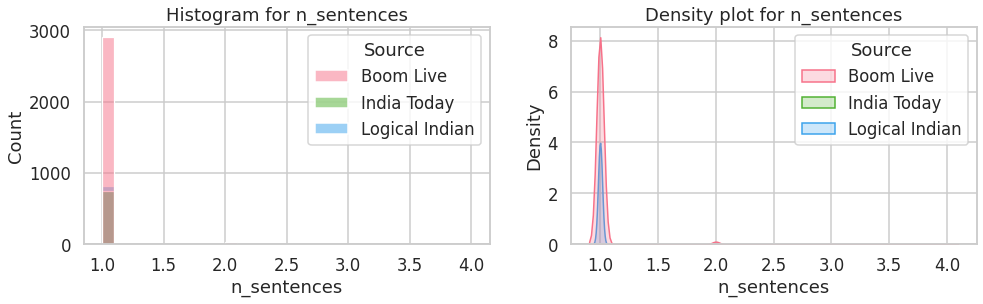

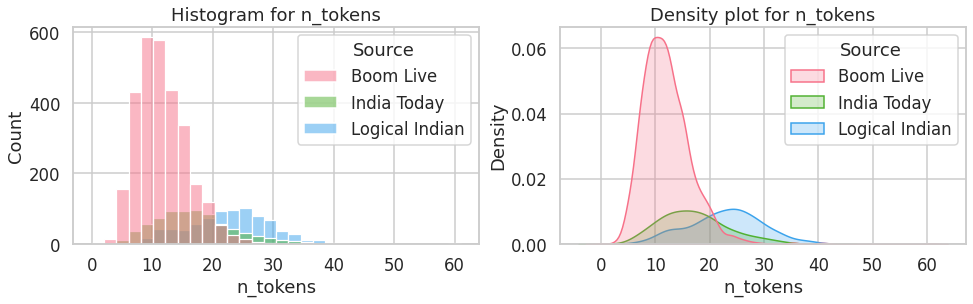

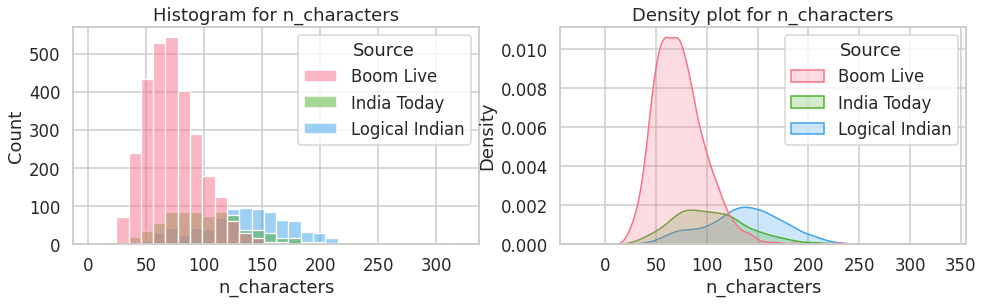

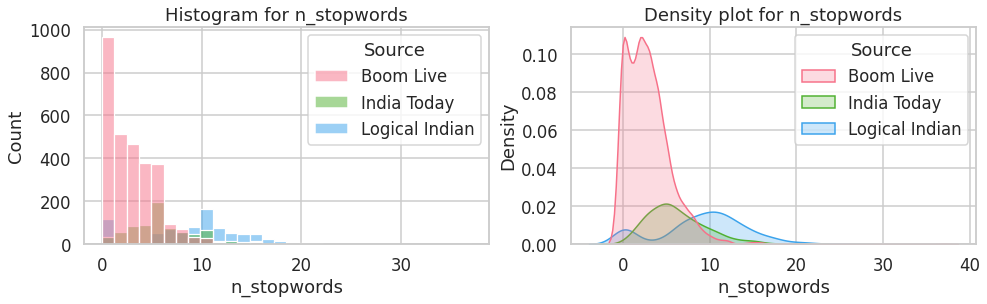

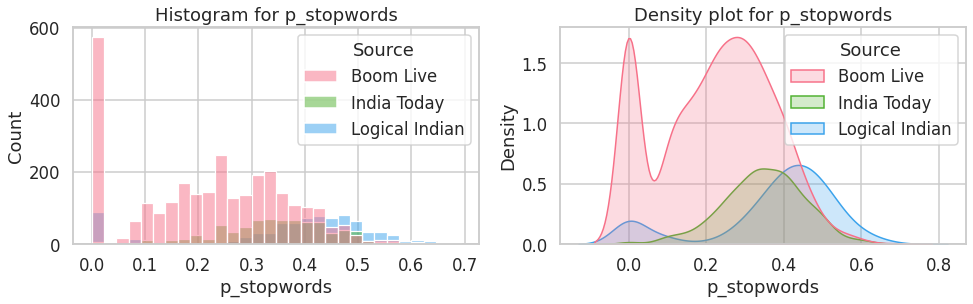

In [ ]:
def plot_distribution(df, var, hue):
    """Plot overlayed histogram and density plot per sentiment."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,4])
    
    # Histogram
    sns.histplot(data=df, x=var, hue=hue, bins=30, kde=False, ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    # Density plot
    sns.kdeplot(data=df, x=var, hue=hue, shade=True, ax=ax[1])
    ax[1].set_title(f"Density plot for {var}");
    
# Plot for all numerical variables
for var in num_vars:
    plot_distribution(train, var, 'Source')

In [ ]:
boomlive_documents = [preprocess_text(document) for document in train.loc[train['Source']=='Boom Live', 'Claims']]
boomlive_tokens = [item for sublist in boomlive_documents for item in sublist]
boomlive_freq = FreqDist(boomlive_tokens)
boomlive_common = [word for word, frequency in boomlive_freq.most_common(20)]
print(f"***** 20 frequent tokens in boomlive claims: *****\n{boomlive_documents}\n")
indiatoday_documents = [preprocess_text(document) for document in train.loc[train['Source']=='India Today', 'Claims']]
indiatoday_tokens = [item for sublist in indiatoday_documents for item in sublist]
indiatoday_freq = FreqDist(indiatoday_tokens)
indiatoday_common = [word for word, frequency in indiatoday_freq.most_common(20)]
print(f"***** 20 frequent tokens in indiatoday claims: *****\n{indiatoday_common}\n")
logicalindian_documents = [preprocess_text(document) for document in train.loc[train['Source']=='Logical Indian', 'Claims']]
logicalindian_tokens = [item for sublist in logicalindian_documents for item in sublist]
logicalindian_freq = FreqDist(logicalindian_tokens)
logicalindian_common = [word for word, frequency in logicalindian_freq.most_common(20)]
print(f"***** 20 frequent tokens in indiatoday claims: *****\n{logicalindian_common}\n")
common = set(boomlive_common).union(logicalindian_common).union(indiatoday_common)
print(f"***** Their union: *****\n{common}\n")
#overallcommon = set(common).union(indiatoday_common)
#print(f"***** Their union: *****\n{overallcommon}\n")


***** 20 frequent tokens in boomlive claims: *****
[]

***** 20 frequent tokens in indiatoday claims: *****
['picture', 'covid', 'coronavirus', 'protest', 'india', 'delhi', 'police', 'people', 'man', 'farmers', 'government', 'president', 'woman', 'modi', 'old', 'say', 'minister', 'muslim', 'us', 'gandhi']

***** 20 frequent tokens in indiatoday claims: *****
['old', 'go', 'protest', 'farmers', 'modi', 'india', 'covid', 'police', 'bjp', 'man', 'delhi', 'pm', 'government', 'minister', 'say', 'recent', 'coronavirus', 'gandhi', 'ongoing', 'people']

***** Their union: *****
{'india', 'ongoing', 'people', 'covid', 'president', 'gandhi', 'woman', 'police', 'delhi', 'go', 'man', 'us', 'modi', 'farmers', 'minister', 'say', 'muslim', 'recent', 'old', 'coronavirus', 'picture', 'government', 'pm', 'protest', 'bjp'}



In [ ]:
common_freq = pd.DataFrame(index=common, columns=["Boom Live", "India Today", "Logical Indian"])
for token in common:
    common_freq.loc[token, "Boom Live"] = boomlive_freq[token]
    common_freq.loc[token, "India Today"] = indiatoday_freq[token]
    common_freq.loc[token, "Logical Indian"] = logicalindian_freq[token]
common_freq.sort_values(by="Logical Indian", inplace=True)
# Add ranks and rank difference
common_freq['Boom Live_rank'] = common_freq['Boom Live'].rank()
common_freq['India Today_rank'] = common_freq['India Today'].rank()
common_freq['Logical Indian_rank'] = common_freq['Logical Indian'].rank()
#common_freq['rank_diff'] = common_freq['neg_rank'] - common_freq['pos_rank']
#common_freq.sort_values(by='rank_diff', inplace=True)
common_freq.head()

,Boom Live,India Today,Logical Indian,Boom Live_rank,India Today_rank,Logical Indian_rank
us,0,30,14,13.0,7.5,1.5
picture,0,103,14,13.0,25.0,1.5
woman,0,33,21,13.0,12.5,3.0
president,0,34,23,13.0,14.0,4.0
muslim,0,30,25,13.0,7.5,5.0


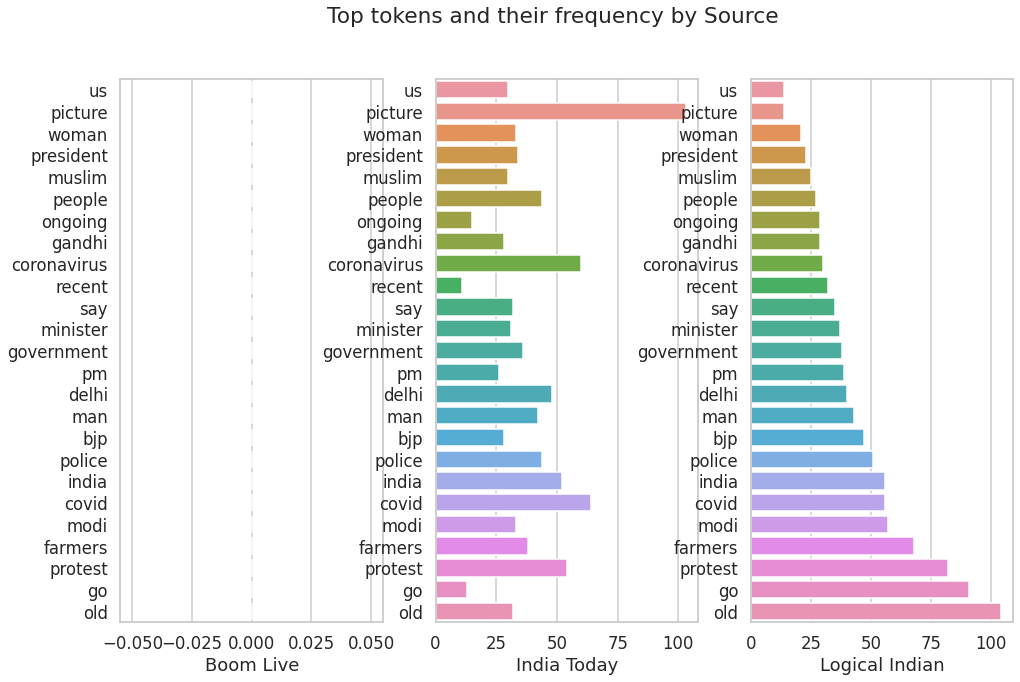

In [ ]:
fig, ax =plt.subplots(1, 3, figsize=(16, 10))
sns.barplot(x="Boom Live", y=common_freq.index, data = common_freq, ax=ax[0])
sns.barplot(x="India Today", y=common_freq.index, data = common_freq, ax=ax[1])
sns.barplot(x="Logical Indian", y=common_freq.index, data = common_freq, ax=ax[2])
fig.suptitle('Top tokens and their frequency by Source');